# 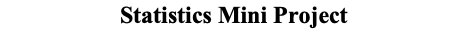

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b)	Is there any evidence that the players overall rating is greater than 80?

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

Note: 
1) Perform all the Statistical analysis with 5% (Significance level). 
       2) Assume all the features are normally distributed and have equal variance.



In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats
import random
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [5]:
fifa = pd.read_csv("fifa_stats.csv")

In [7]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [110]:
age = fifa['Age']

In [111]:
random.seed(1)
sample = random.choices(population = age,k=200)

In [112]:
n_sample = len(sample)

In [113]:
sigma_pop = np.std(age)
sigma_sample = np.std(sample)
mu = np.mean(age)

In [114]:
standard_error = sigma_pop/n_sample**0.5
print("Standard error is : ",standard_error)

Standard error is :  0.2728086119425111


In [115]:
x_bar = np.mean(sample)

print("mean of sampling distribution : ",x_bar)

mean of sampling distribution :  27.22


In [116]:
mu-x_bar #mu and x_bar are almost same.

0.01150000000000162

In [117]:
sigma_sample-sigma_pop # deviation of population is almost equal to deviation of sample

0.04210873339807053

In [118]:
# as the sample size gets closer to the true size of the population, 
#the sample means cluster more and more around the true population mean thats why it decreases

### b)	Is there any evidence that the players overall rating is greater than 80?

In [119]:
#H0: mu<=80
#H1 : mu>80

overall = fifa['Overall_rating']

In [120]:
mu =80
x_bar = overall.mean()
sigma = np.std(overall)
n = len(overall)
alpha = 0.05

In [121]:
z_stat = (x_bar-mu)/(sigma/n**0.5)
z_stat

-24.544597415236936

In [122]:
p_value = stats.norm.cdf(z_stat)
p_value

2.46971519973599e-133

In [123]:
p_value<alpha # since p_value is lesser than alpha we reject H0.

True

In [124]:
#So, the overall rating is greater than 80.

### c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.



In [125]:
#H0: colmns are independent
#H1: columns are dependent
table = pd.crosstab(fifa['Preferred Foot'],fifa['Potential'])

In [126]:
table.head(2)

Potential,75,76,77,78,79,80,81,82,83,84,...,86,87,88,89,90,91,92,93,94,95
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,59,42,41,31,34,51,32,29,30,32,...,17,16,9,13,6,1,4,0,2,0
Right,153,182,176,114,120,142,111,100,107,78,...,49,36,32,18,15,11,5,4,1,1


In [140]:
observed_value = table.values
chi_stat, p_value, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

In [141]:
p_value

0.07747130218941192

In [159]:
p_value<0.05

False

In [160]:
# Thus we fail to reject null hypothesis.
# So, preffered foot has no impact on potential

/Users/pratikshapatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

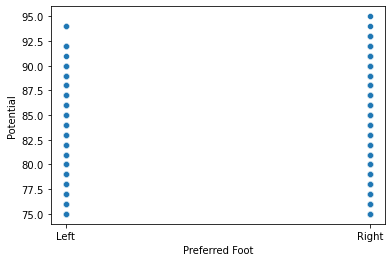

In [162]:
sns.scatterplot(fifa['Preferred Foot'],fifa['Potential'])

### e) Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

In [180]:
#H0: Overall rating and skill move are independent
#H1: Overall rating and skill move are are dependent
table1 = pd.crosstab(fifa['Skill Moves'],fifa['Overall_rating'])

In [181]:
table1.head(2)

Overall_rating,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94
Skill Moves,,,,,,,,,,,,,,,,,,,
1,38,32,23,15,19,18,5,12,13,7,2,1,1,3,3,1,1,0,0
2,96,78,63,30,24,25,13,20,10,10,12,6,3,2,2,1,0,0,0


In [182]:
observed_value = table1.values
chi_stat, p_value, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
p_value

9.004103479489286e-24

In [183]:
p_value<0.05

True

/Users/pratikshapatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

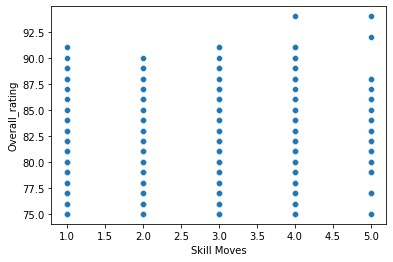

In [236]:
#since p is low we reject the null hypothesis
sns.scatterplot(fifa['Skill Moves'],fifa['Overall_rating'])

2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 

a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

e)	Perform statistical tests to identify the relation between network and network_type. 



In [188]:
df= pd.read_csv("phone.csv")

In [193]:
df.isnull().sum() #no null values

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [200]:
df['date']=pd.to_datetime(df['date'])
df['month']= pd.to_datetime(df['month'])

#### a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [201]:
df

,date,duration,item,month,network,network_type
0,2014-10-15 06:58:00,221.321120,data,2014-11-01,data,data
1,2014-10-15 06:58:00,81.610599,call,2014-11-01,Vodafone,mobile
2,2014-10-15 14:46:00,143.109111,call,2014-11-01,Meteor,mobile
3,2014-10-15 14:48:00,111.888670,call,2014-11-01,Tesco,mobile
4,2014-10-15 17:27:00,246.695171,call,2014-11-01,Tesco,mobile
...,...,...,...,...,...,...
815,2015-10-03 06:58:00,185.328156,data,2015-03-01,data,data
816,2015-11-03 06:58:00,89.819383,data,2015-03-01,data,data
817,2015-12-03 06:58:00,117.604998,data,2015-03-01,data,data
818,2015-03-13 00:39:00,77.834006,sms,2015-03-01,Vodafone,mobile


In [206]:
sample = df['duration']
x_bar = sample.mean()
sigma = np.std(sample)
n = len(sample)

In [213]:
conf95 = stats.norm.interval(0.95,loc=x_bar,scale=sigma/n**0.5)
conf95

(141.1797470762666, 147.4301240434043)

In [212]:
conf99 = stats.norm.interval(0.99,loc=x_bar,scale=sigma/n**0.5)
conf99

(140.1977416835259, 148.41212943614502)

In [214]:
#confidence interval of 99% is wider

### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [243]:
grp1=df[df['network']=='Vodafone']['duration']
grp2=df[df['network']=='Three']['duration']
grp3=df[df['network']=='data']['duration']
grp4=df[df['network']=='Meteor']['duration']
grp5=df[df['network']=='Tesco']['duration']
grp6=df[df['network']=='landline']['duration']
grp7=df[df['network']=='voicemail']['duration']

In [250]:
s,p_val = stats.levene(grp1,grp2,grp3,grp4,grp5,grp6,grp7)
p_val


0.1653481809327658

In [251]:
p_val<0.05

False

In [252]:
#since p_val is not smaller than 0.05, therefore we failed to reject null hypothesis. i.e 
#

#### c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.


<AxesSubplot:ylabel='Density'>

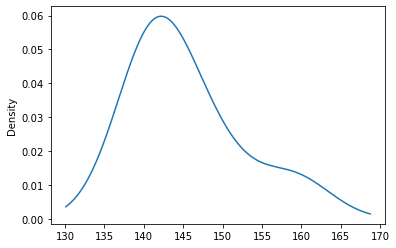

In [256]:
df.groupby(df['network'])['duration'].mean().plot(kind='kde')

#### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [264]:
data = df[df['item']=='data']['duration']
sms = df[df['item']=='sms']['duration']
call = df[df['item']=='call']['duration']

In [265]:
stats.f_oneway(data,sms,call)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

In [ ]:
#since p_val is greater than 0.05 therefore we fail to reject

#### e)	Perform statistical tests to identify the relation between network and network_type. 

In [273]:
table2 = pd.crosstab(df['network'],df['network_type'])

In [274]:
observed_value = table2.values

In [275]:
chi_stat,p,dof,expected_value = chi2_contingency(observed_value,correction=False)

In [276]:
p

0.0

In [ ]:
#